Objective of our project is to predict which customer might default in upcoming months. Before going any fudther let's have a quick look on defination of what actually meant by Credit Card Default.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("UCI_Credit_Card.csv")
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
X2: Gender (1 = male; 2 = female).
X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
X4: Marital status (1 = married; 2 = single; 3 = others).
X5: Age (year).
X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows:
   X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;
   X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month;
         2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .;
  X17 = amount of bill statement in April, 2005.
X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;
  X23 = amount paid in April, 2005.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

There are 30000 rows and 25 columns in the dataset. In our dataset we got customer credit card transaction history for past 6 month , on basis of which we have to predict if cutomer will default or not.

In [68]:
df.isna().sum()
# no null row in any of the column.

,0
ID,0
LIMIT_BAL,0
SEX,0
EDUCATION,0
MARRIAGE,0
AGE,0
PAY_SEPT,0
PAY_AUG,0
PAY_JUL,0
PAY_JUN,0


In [5]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


Lets start EDA( Exploratory Data Analysis).

In [6]:
# dependent variable(Target Variable)

df["IsDefault"] =  df["default.payment.next.month"]
df.drop('default.payment.next.month', axis = 1, inplace =True)
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,IsDefault
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


<Axes: xlabel='IsDefault', ylabel='count'>

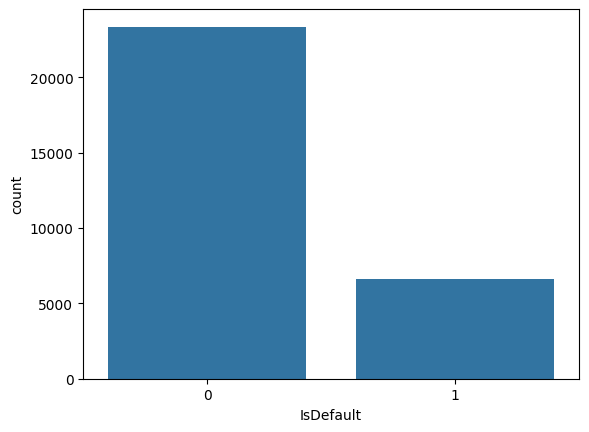

In [69]:
sns.countplot(x= "IsDefault", data =df)
# as target variables belongs to the class imbalances, so we need to balance the class in the further steps.

In [8]:
# independent variables

df.SEX.value_counts()
# 1 = male , 2 = female
# this shows females use more credit cards as compare to males.

,count
SEX,
2,18112
1,11888


In [9]:
df['EDUCATION'].value_counts()

,count
EDUCATION,
2,14030
1,10585
3,4917
5,280
4,123
6,51
0,14


As we can see in dataset we have values like 5,6,0 as well for which we are not having description so we can add up them in 4, which is Others.

In [10]:
df['EDUCATION'] = df['EDUCATION'].replace({0:4,5:4,6:4})
df['EDUCATION'].value_counts()
# 1 = graduate school; 2 = university; 3 = high school; 4 = others

,count
EDUCATION,
2,14030
1,10585
3,4917
4,468


In [11]:
df['MARRIAGE'].value_counts()

,count
MARRIAGE,
2,15964
1,13659
3,323
0,54


In [12]:
df.MARRIAGE = df.MARRIAGE.replace({0:3})
df.MARRIAGE.value_counts()
# 1 = married, 2 = single, 3 = others
# singles uses more cards as compared to other categories.

,count
MARRIAGE,
2,15964
1,13659
3,377


In [13]:
# sex, married and educations are categorical columns
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE']

df_cat = df[categorical_features]
df_cat["default"] = df["IsDefault"]
df_cat

,SEX,EDUCATION,MARRIAGE,default
0,2,2,1,1
1,2,2,2,1
2,2,2,2,0
3,2,2,1,0
4,1,2,1,0
...,...,...,...,...
29995,1,3,1,0
29996,1,3,2,0
29997,1,2,2,1
29998,1,3,1,1


In [14]:
# for visualising we need to provide the manes to every tabular data.
df_cat.replace({"SEX":{1:"Male",2:"Female"},
                "EDUCATION": { 1 : "graduate_school", 2 :" university", 3 : "high_school", 4 : "others"},
                "MARRIAGE":{1:"married", 2 :"single", 3 :"others"}}, inplace = True)
df_cat

,SEX,EDUCATION,MARRIAGE,default
0,Female,university,married,1
1,Female,university,single,1
2,Female,university,single,0
3,Female,university,married,0
4,Male,university,married,0
...,...,...,...,...
29995,Male,high_school,married,0
29996,Male,high_school,single,0
29997,Male,university,single,1
29998,Male,high_school,married,1


<Figure size 700x500 with 0 Axes>

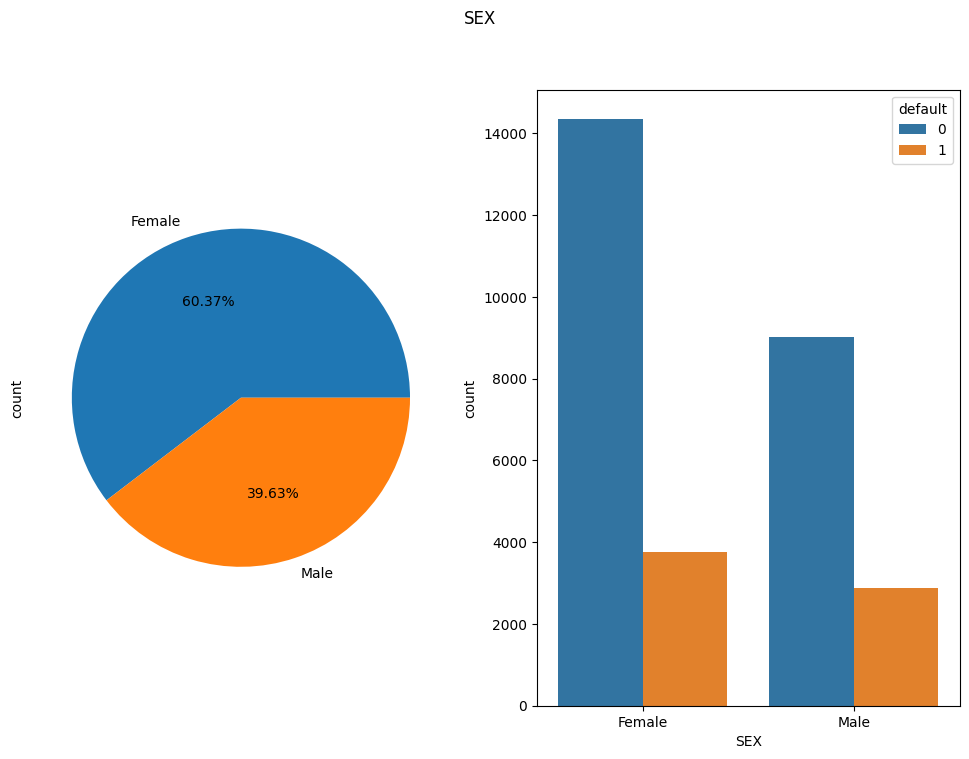

<Figure size 700x500 with 0 Axes>

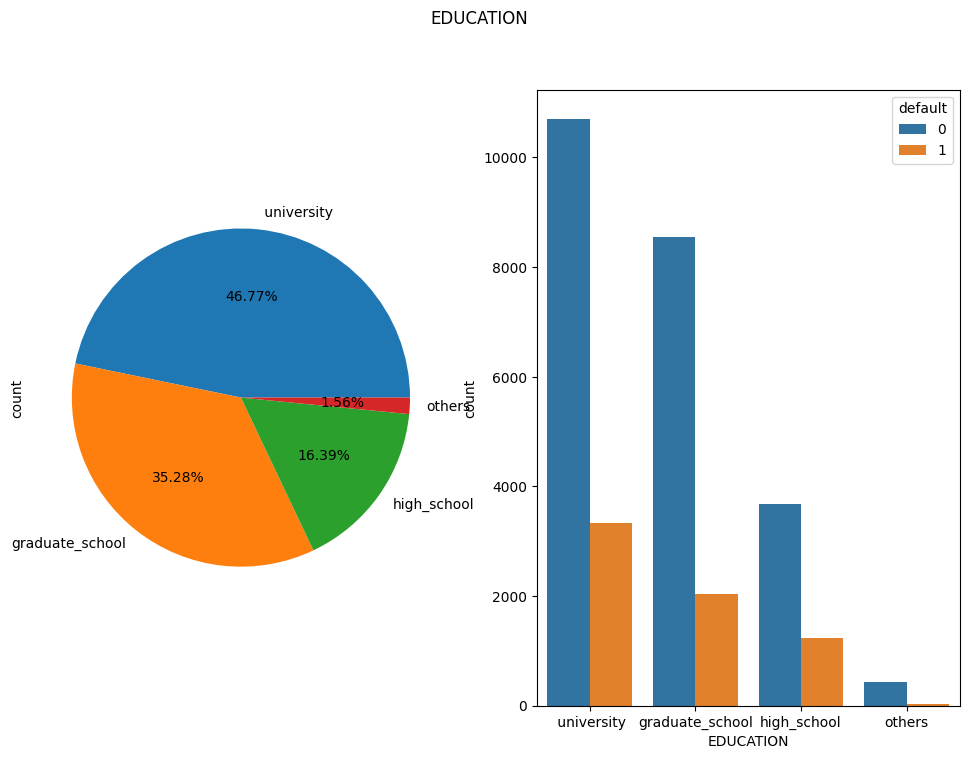

<Figure size 700x500 with 0 Axes>

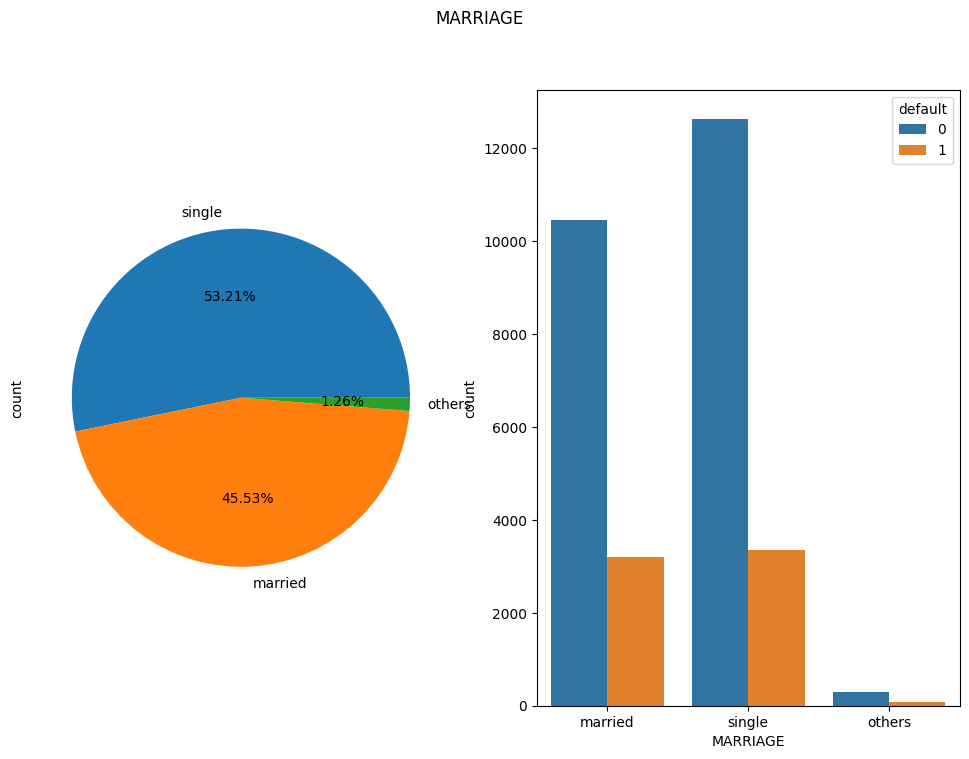

In [15]:
for col in categorical_features:
  plt.figure(figsize=(7,5))
  fig, axes = plt.subplots(ncols=2,figsize=(12,8))
  plt.suptitle(col)
  df_cat[col].value_counts().plot(kind="pie",ax = axes[0],subplots=True,autopct='%1.2f%%')
  sns.countplot(x = col, hue = 'default', data = df_cat)

Below are few observations for categorical features:

There are more females credit card holder,so no. of defaulter have high proportion of females.
No. of defaulters have a higher proportion of educated people (graduate school and university)
No. of defaulters have a higher proportion of Singles.

#AGE


In [16]:
df.AGE.describe()

,AGE
count,30000.000000
mean,35.485500
std,9.217904
min,21.000000
25%,28.000000
50%,34.000000
75%,41.000000
max,79.000000


In [17]:
df.groupby("IsDefault")["AGE"].describe()

,count,mean,std,min,25%,50%,75%,max
IsDefault,,,,,,,,
0,23364.0,35.417266,9.077355,21.0,28.0,34.0,41.0,79.0
1,6636.0,35.725738,9.693438,21.0,28.0,34.0,42.0,75.0


Text(0, 0.5, 'Count')

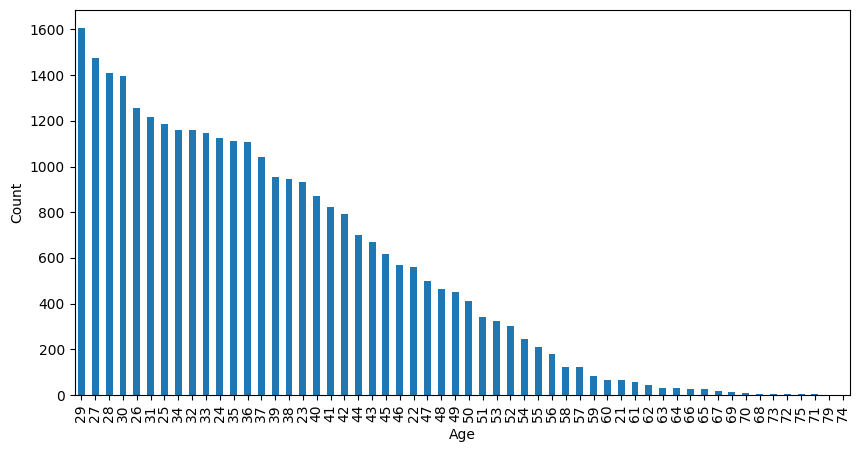

In [18]:
df.AGE.value_counts().plot(kind = "bar", figsize = (10,5))
plt.xlabel("Age")
plt.ylabel("Count")

<Axes: xlabel='IsDefault', ylabel='AGE'>

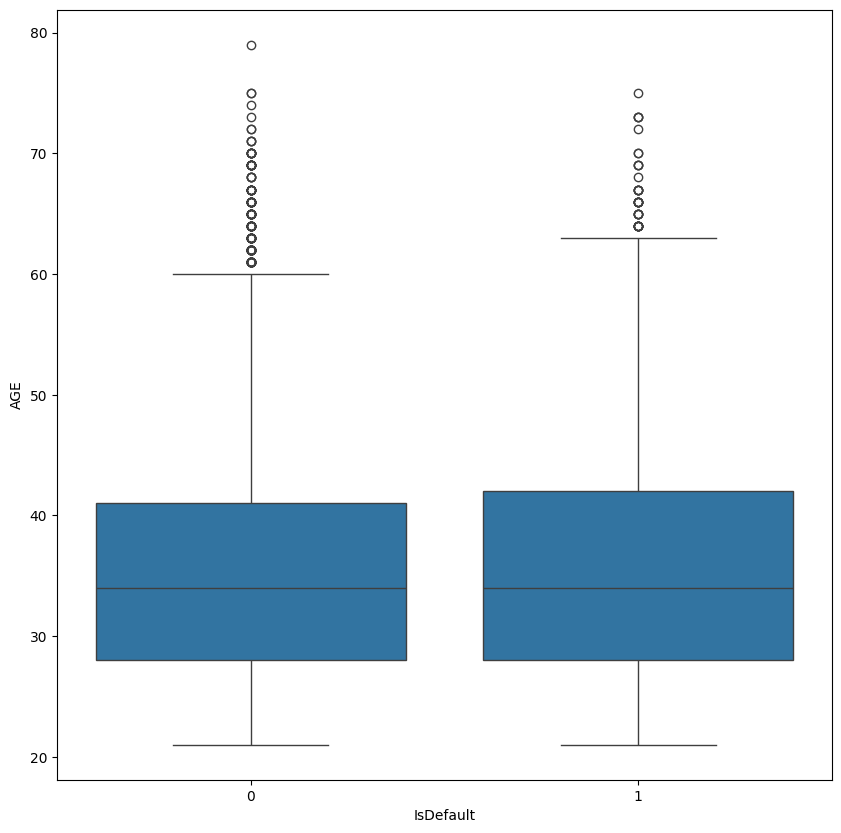

In [19]:
plt.figure(figsize=(10,10))
sns.boxplot(x="IsDefault", y="AGE", data=df)

In [20]:
#renaming columns

df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

In [21]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefault
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [22]:
for i in df.IsDefault.value_counts():
  print((i/(df.IsDefault.value_counts()[0] +df.IsDefault.value_counts()[1]))*100)

# this shows that these class are imbalances than we need to manage the class imbalances.

77.88000000000001
22.12


In [23]:
# the treatment of class imbalance of the target variables.

from imblearn.over_sampling import SMOTE

smote = SMOTE()
X = df.drop('IsDefault', axis=1)
y = df['IsDefault']
X_smote, y_smote = smote.fit_resample(X, y)

len(df),len(y_smote)

(30000, 46728)

In [24]:
X_smote

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR
0,1,20000.000000,2,2,1,24,2,2,-1,-1,...,689.000000,0.000000,0.000000,0.000000,0.000000,689.000000,0.000000,0.000000,0.000000,0.000000
1,2,120000.000000,2,2,2,26,-1,2,0,0,...,2682.000000,3272.000000,3455.000000,3261.000000,0.000000,1000.000000,1000.000000,1000.000000,0.000000,2000.000000
2,3,90000.000000,2,2,2,34,0,0,0,0,...,13559.000000,14331.000000,14948.000000,15549.000000,1518.000000,1500.000000,1000.000000,1000.000000,1000.000000,5000.000000
3,4,50000.000000,2,2,1,37,0,0,0,0,...,49291.000000,28314.000000,28959.000000,29547.000000,2000.000000,2019.000000,1200.000000,1100.000000,1069.000000,1000.000000
4,5,50000.000000,1,2,1,57,-1,0,-1,0,...,35835.000000,20940.000000,19146.000000,19131.000000,2000.000000,36681.000000,10000.000000,9000.000000,689.000000,679.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,16943,120000.000000,2,2,1,42,2,1,1,2,...,67774.063949,68637.813599,69656.980634,70634.636180,3151.148853,3241.838164,2569.770229,2591.898502,2247.884118,3000.000000
46724,12613,280000.000000,2,1,1,61,1,1,1,1,...,2438.935065,2486.459514,2449.112554,2443.360060,29.499969,12.684986,60.209436,22.862476,17.109982,30.355468
46725,7388,96034.191864,2,2,1,44,2,2,0,0,...,87001.010347,87570.183666,80613.184695,80917.818021,1539.130138,3181.025756,2823.533348,2405.128780,3325.416036,2198.290407
46726,23122,20000.000000,2,1,1,46,2,2,2,2,...,16668.146804,16109.376258,15918.212351,16290.721457,491.781458,2081.516870,0.000000,245.890729,718.036424,1134.028195


In [25]:
COLumns = X_smote.columns

In [26]:
Bal_df = pd.DataFrame(X_smote, columns = COLumns)
Bal_df["IsDefault"] = y_smote
Bal_df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefault
0,1,20000.000000,2,2,1,24,2,2,-1,-1,...,0.000000,0.000000,0.000000,0.000000,689.000000,0.000000,0.000000,0.000000,0.000000,1
1,2,120000.000000,2,2,2,26,-1,2,0,0,...,3272.000000,3455.000000,3261.000000,0.000000,1000.000000,1000.000000,1000.000000,0.000000,2000.000000,1
2,3,90000.000000,2,2,2,34,0,0,0,0,...,14331.000000,14948.000000,15549.000000,1518.000000,1500.000000,1000.000000,1000.000000,1000.000000,5000.000000,0
3,4,50000.000000,2,2,1,37,0,0,0,0,...,28314.000000,28959.000000,29547.000000,2000.000000,2019.000000,1200.000000,1100.000000,1069.000000,1000.000000,0
4,5,50000.000000,1,2,1,57,-1,0,-1,0,...,20940.000000,19146.000000,19131.000000,2000.000000,36681.000000,10000.000000,9000.000000,689.000000,679.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,16943,120000.000000,2,2,1,42,2,1,1,2,...,68637.813599,69656.980634,70634.636180,3151.148853,3241.838164,2569.770229,2591.898502,2247.884118,3000.000000,1
46724,12613,280000.000000,2,1,1,61,1,1,1,1,...,2486.459514,2449.112554,2443.360060,29.499969,12.684986,60.209436,22.862476,17.109982,30.355468,1
46725,7388,96034.191864,2,2,1,44,2,2,0,0,...,87570.183666,80613.184695,80917.818021,1539.130138,3181.025756,2823.533348,2405.128780,3325.416036,2198.290407,1
46726,23122,20000.000000,2,1,1,46,2,2,2,2,...,16109.376258,15918.212351,16290.721457,491.781458,2081.516870,0.000000,245.890729,718.036424,1134.028195,1


In [27]:
Bal_df.IsDefault.value_counts()

,count
IsDefault,
1,23364
0,23364


In [28]:
balan_df = Bal_df.copy()

# Feature engineering

In [29]:
balan_df["PAYMENT"] = balan_df["PAY_SEPT"] + balan_df["PAY_AUG"] + balan_df["PAY_JUL"] + balan_df["PAY_JUN"] + balan_df["PAY_MAY"] + balan_df["PAY_APR"]

In [30]:
balan_df.groupby("IsDefault")["PAYMENT"].mean()

,PAYMENT
IsDefault,
0,-1.980140
1,1.647749


<Axes: xlabel='IsDefault', ylabel='PAYMENT'>

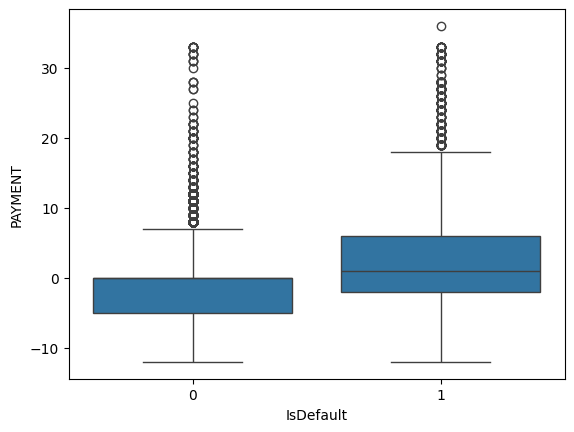

In [31]:
sns.boxplot(x="IsDefault", y="PAYMENT", data=balan_df)

In [32]:
balan_df["TOTAL_DUE"] = balan_df["BILL_AMT_SEPT"] + balan_df["BILL_AMT_AUG"] + balan_df["BILL_AMT_JUL"] + balan_df["BILL_AMT_JUN"] + balan_df["BILL_AMT_MAY"] + balan_df["BILL_AMT_APR"]

In [33]:
balan_df.groupby("IsDefault")["TOTAL_DUE"].mean()

,TOTAL_DUE
IsDefault,
0,272428.907850
1,257542.003462


In [34]:
balan_df.drop(["ID","PAYMENT","TOTAL_DUE"], inplace = True, axis=1)
balan_df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefault
0,20000.000000,2,2,1,24,2,2,-1,-1,-2,...,0.000000,0.000000,0.000000,0.000000,689.000000,0.000000,0.000000,0.000000,0.000000,1
1,120000.000000,2,2,2,26,-1,2,0,0,0,...,3272.000000,3455.000000,3261.000000,0.000000,1000.000000,1000.000000,1000.000000,0.000000,2000.000000,1
2,90000.000000,2,2,2,34,0,0,0,0,0,...,14331.000000,14948.000000,15549.000000,1518.000000,1500.000000,1000.000000,1000.000000,1000.000000,5000.000000,0
3,50000.000000,2,2,1,37,0,0,0,0,0,...,28314.000000,28959.000000,29547.000000,2000.000000,2019.000000,1200.000000,1100.000000,1069.000000,1000.000000,0
4,50000.000000,1,2,1,57,-1,0,-1,0,0,...,20940.000000,19146.000000,19131.000000,2000.000000,36681.000000,10000.000000,9000.000000,689.000000,679.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,120000.000000,2,2,1,42,2,1,1,2,1,...,68637.813599,69656.980634,70634.636180,3151.148853,3241.838164,2569.770229,2591.898502,2247.884118,3000.000000,1
46724,280000.000000,2,1,1,61,1,1,1,1,1,...,2486.459514,2449.112554,2443.360060,29.499969,12.684986,60.209436,22.862476,17.109982,30.355468,1
46725,96034.191864,2,2,1,44,2,2,0,0,0,...,87570.183666,80613.184695,80917.818021,1539.130138,3181.025756,2823.533348,2405.128780,3325.416036,2198.290407,1
46726,20000.000000,2,1,1,46,2,2,2,2,1,...,16109.376258,15918.212351,16290.721457,491.781458,2081.516870,0.000000,245.890729,718.036424,1134.028195,1


# Logistic Regression

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,recall_score, precision_score
from sklearn.model_selection import GridSearchCV

In [36]:
x= balan_df.drop("IsDefault", axis=1)
y= balan_df.IsDefault

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [37]:
param_grid = {'penalty':['l1','l2'], 'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

In [38]:
gridcv = GridSearchCV(LogisticRegression(), param_grid, cv=5)
gridcv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']})

In [39]:
gridcv.best_params_

{'C': 0.01, 'penalty': 'l2'}

In [40]:
model = LogisticRegression(C=0.01, penalty='l2')
model.fit(x_train, y_train)

LogisticRegression(C=0.01)

In [41]:
y_pred = model.predict(x_test)

In [42]:
print(f" Confusion Matrix: {confusion_matrix(y_test, y_pred)}")
print(f" Classification Report: {classification_report(y_test, y_pred)}")
print(f" Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(f" Recall Score: {recall_score(y_test, y_pred)}")
print(f" Precision score: {precision_score(y_test, y_pred)}")

 Confusion Matrix: [[3571 1093]
 [2882 1800]]
 Classification Report:               precision    recall  f1-score   support

           0       0.55      0.77      0.64      4664
           1       0.62      0.38      0.48      4682

    accuracy                           0.57      9346
   macro avg       0.59      0.58      0.56      9346
weighted avg       0.59      0.57      0.56      9346

 Accuracy Score: 0.5746843569441472
 Recall Score: 0.3844510892780863
 Precision score: 0.6221914967162115


Here, Logistic Regression provides 57% accuracy which is not quite good enough. So, need to check on the other model.

# Support Vector Classifier

In [43]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid1 = {'C': [0.1, 1, 10],
              'kernel': ['rbf']}

In [ ]:
gridcv1 = GridSearchCV(SVC(), param_grid1, cv=5,scoring = "accuracy")
gridcv1.fit(x_train, y_train)

In [ ]:
gridcv1.best_params_

{'C': 10, 'kernel': 'rbf'}

In [ ]:
model2 = SVC(C=10, kernel='rbf')
model2.fit(x_train, y_train)
y_pred1 = model2.predict(x_test)

In [ ]:
print(f" Confusion Matrix: {confusion_matrix(y_test, y_pred1)}")
print(f" Classification Report: {classification_report(y_test, y_pred1)}")
print(f" Accuracy Score: {accuracy_score(y_test, y_pred1)}")
print(f" Recall Score: {recall_score(y_test, y_pred1)}")
print(f" Precision score: {precision_score(y_test, y_pred1)}")

 Confusion Matrix: [[2493 2171]
 [1227 3455]]
 Classification Report:               precision    recall  f1-score   support

           0       0.67      0.53      0.59      4664
           1       0.61      0.74      0.67      4682

    accuracy                           0.64      9346
   macro avg       0.64      0.64      0.63      9346
weighted avg       0.64      0.64      0.63      9346

 Accuracy Score: 0.6364219987160282
 Recall Score: 0.7379325074754378
 Precision score: 0.6141130465694987


SVM provide accuracy of 62% which is better than Logistic Regression, but we need to check the other models for the accuracy.

# Decision Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
param_grid2 = {'max_depth': [10,20,30,50,100], 'min_samples_split':[0.1,0.2,0.4]}

In [45]:
gridcv2 = GridSearchCV(DecisionTreeClassifier(), param_grid2, cv=5,scoring = "accuracy")
gridcv2.fit(x_train, y_train)
gridcv2.best_params_

{'max_depth': 10, 'min_samples_split': 0.1}

In [46]:
model3 = DecisionTreeClassifier(max_depth=10, min_samples_split=0.1)
model3.fit(x_train, y_train)
y_pred2 = model3.predict(x_test)

In [47]:
print(f" Confusion Matrix: {confusion_matrix(y_test, y_pred2)}")
print(f" Classification Report: {classification_report(y_test, y_pred2)}")
print(f" Accuracy Score: {accuracy_score(y_test, y_pred2)}")
print(f" Recall Score: {recall_score(y_test, y_pred2)}")
print(f" Precision score: {precision_score(y_test, y_pred2)}")

 Confusion Matrix: [[3907  757]
 [1918 2764]]
 Classification Report:               precision    recall  f1-score   support

           0       0.67      0.84      0.74      4664
           1       0.79      0.59      0.67      4682

    accuracy                           0.71      9346
   macro avg       0.73      0.71      0.71      9346
weighted avg       0.73      0.71      0.71      9346

 Accuracy Score: 0.7137812968114702
 Recall Score: 0.5903460059803503
 Precision score: 0.7850042601533656


here the Decision tree model provides accuracy about 71.4% which is quite good.

# Random forest

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
param_grid3 = {'n_estimators': [50,100,150,200], 'max_depth': [5,10,20,30]}

In [50]:
gridcv3 = GridSearchCV(RandomForestClassifier(), param_grid3, cv=5,scoring = "accuracy")
gridcv3.fit(x_train, y_train)
gridcv3.best_params_

{'max_depth': 30, 'n_estimators': 200}

In [51]:
gridcv3.best_score_

0.8363384147984263

In [52]:
model4 = RandomForestClassifier(max_depth=30, n_estimators=200)
model4.fit(x_train, y_train)
y_pred3 = model4.predict(x_test)

In [53]:
print(f" Confusion Matrix: {confusion_matrix(y_test, y_pred3)}")
print(f" Classification Report: {classification_report(y_test, y_pred3)}")
print(f" Accuracy Score: {accuracy_score(y_test, y_pred3)}")
print(f" Recall Score: {recall_score(y_test, y_pred3)}")
print(f" Precision score: {precision_score(y_test, y_pred3)}")

 Confusion Matrix: [[4046  618]
 [ 831 3851]]
 Classification Report:               precision    recall  f1-score   support

           0       0.83      0.87      0.85      4664
           1       0.86      0.82      0.84      4682

    accuracy                           0.84      9346
   macro avg       0.85      0.85      0.84      9346
weighted avg       0.85      0.84      0.84      9346

 Accuracy Score: 0.8449604108709609
 Recall Score: 0.8225117471166168
 Precision score: 0.8617140299843365


Random Forest shows the good accuracy about 85% which is quite good.

---



# XGBOOST

In [54]:
from xgboost import XGBClassifier

In [55]:
param_grid4 = {'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2]}

In [56]:
gridcv4 = GridSearchCV(XGBClassifier(), param_grid4, cv=5,scoring = "accuracy")
gridcv4.fit(x_train, y_train)
gridcv4.best_params_

{'learning_rate': 0.2, 'n_estimators': 300}

In [57]:
model5 = XGBClassifier(learning_rate=0.2, n_estimators=300)
model5.fit(x_train, y_train)
y_pred4 = model5.predict(x_test)

In [58]:
print(f" Confusion Matrix: {confusion_matrix(y_test, y_pred4)}")
print(f" Classification Report: {classification_report(y_test, y_pred4)}")
print(f" Accuracy Score: {accuracy_score(y_test, y_pred4)}")
print(f" Recall Score: {recall_score(y_test, y_pred4)}")
print(f" Precision score: {precision_score(y_test, y_pred4)}")

 Confusion Matrix: [[4043  621]
 [ 891 3791]]
 Classification Report:               precision    recall  f1-score   support

           0       0.82      0.87      0.84      4664
           1       0.86      0.81      0.83      4682

    accuracy                           0.84      9346
   macro avg       0.84      0.84      0.84      9346
weighted avg       0.84      0.84      0.84      9346

 Accuracy Score: 0.8382195591696983
 Recall Score: 0.8096967108073473
 Precision score: 0.8592475067996374


# Summary

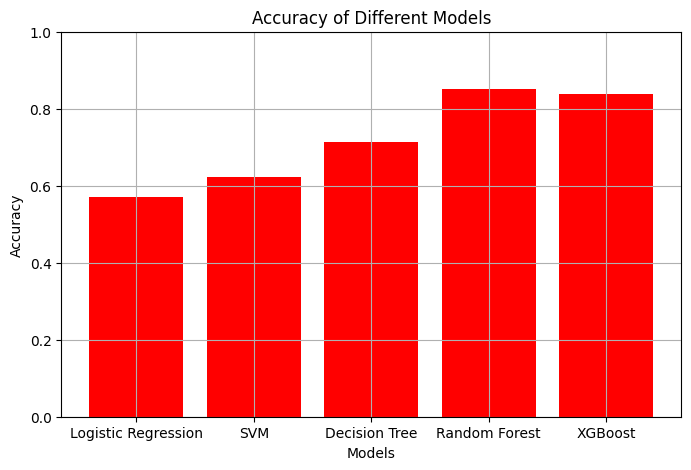

'\nThe accuracy score is a metric used to evaluate the performance of a classification model.\nIt is defined as the ratio of the number of correct predictions to the total number of predictions.\nSo, higher the accuracy higher the correct prediction of the model.\n'

In [64]:
models = ['Logistic Regression', 'SVM', 'Decision Tree','Random Forest', 'XGBoost']
accuracy_scores = [0.572, 0.622, 0.714, 0.85, 0.838]

# Create a bar plot
plt.figure(figsize=(8,5))
plt.bar(models, accuracy_scores, color='red')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.grid()
plt.title('Accuracy of Different Models')
plt.ylim(0, 1)
plt.show()

"""
The accuracy score is a metric used to evaluate the performance of a classification model.
It is defined as the ratio of the number of correct predictions to the total number of predictions.
So, higher the accuracy higher the correct prediction of the model.
"""

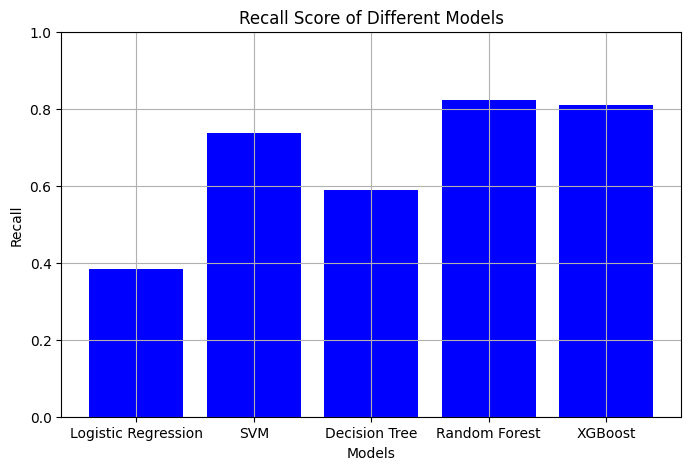

'\nThe recall score is a metric used to evaluate the performance of a classification model.\nIt measures the ability of the model to correctly identify all relevant instances in a dataset.\n A high recall score indicates that the model is good at detecting positive instances,\n but it might also mean that it has a higher number of false positives'

In [63]:
models = ['Logistic Regression', 'SVM', 'Decision Tree','Random Forest', 'XGBoost']
Recall_scores = [0.384, 0.738, 0.590, 0.823, 0.81]

# Create a bar plot
plt.figure(figsize=(8, 5))
plt.bar(models, Recall_scores, color='blue')
plt.xlabel('Models')
plt.ylabel('Recall')
plt.grid()
plt.title('Recall Score of Different Models')
plt.ylim(0, 1)
plt.show()
"""
The recall score is a metric used to evaluate the performance of a classification model.
It measures the ability of the model to correctly identify all relevant instances in a dataset.
 A high recall score indicates that the model is good at detecting positive instances,
 but it might also mean that it has a higher number of false positives"""

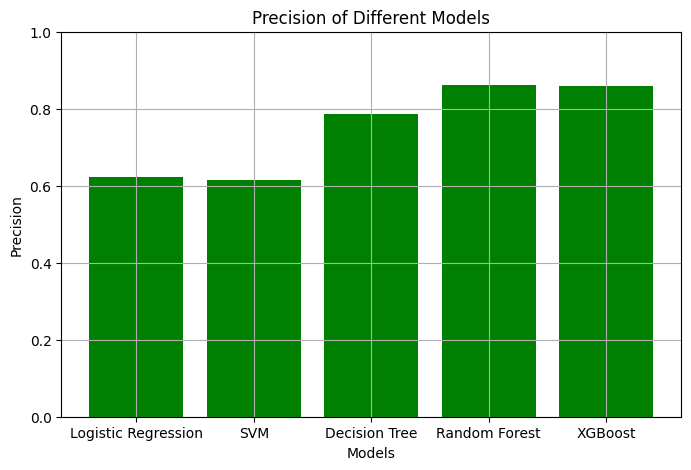

'\nprecision is a metric that measures the accuracy of positive predictions made by a model.\nSpecifically, it is the ratio of true positive predictions to the total number of positive predictions.\n'

In [67]:
models = ['Logistic Regression', 'SVM', 'Decision Tree','Random Forest', 'XGBoost']
Precision_scores = [0.622, 0.614, 0.785, 0.862, 0.86]

# Create a bar plot
plt.figure(figsize=(8,5))
plt.bar(models, Precision_scores, color='green')
plt.xlabel('Models')
plt.ylabel('Precision')
plt.grid()
plt.title('Precision of Different Models')
plt.ylim(0, 1)
plt.show()

"""
precision is a metric that measures the accuracy of positive predictions made by a model.
Specifically, it is the ratio of true positive predictions to the total number of positive predictions.
"""